##### Import Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

##### Config print options 

In [14]:
np.set_printoptions(precision=4)

##### Load Data Set MPG

In [15]:
df = sns.load_dataset('mpg')

# drop character columns
df = df.drop(['origin', 'name'], axis=1)

df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82
394,44.0,4,97.0,52.0,2130,24.6,82
395,32.0,4,135.0,84.0,2295,11.6,82
396,28.0,4,120.0,79.0,2625,18.6,82


In [16]:
# check missing values
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
dtype: int64

In [18]:
# replace missing values with mean column values
df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)

df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
dtype: int64

#### Scaler with StandardScaler

In [19]:
scaler = StandardScaler()
df_t = scaler.fit_transform(df)
df_t = pd.DataFrame(df_t, columns=df.columns)

df_t.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,-0.706439,1.498191,1.090604,0.669196,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.503514,1.586599,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.196232,1.193426,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.061796,1.193426,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,1.042591,0.931311,0.565841,-1.840117,-1.627426


##### PCA Analysis

In [21]:
pca = PCA(n_components=df_t.shape[1])  #Maximum component is all features

# Fit the model
pca.fit_transform(df_t) # Fitting the model

# The amount of variance that each PC explains
print(f'Eigenvalues = {pca.explained_variance_}') #Explained variance
print(f'Explained ratio = {pca.explained_variance_ratio_}') #Explained variance ratio

Eigenvalues = [5.0121 0.868  0.7307 0.1875 0.1276 0.0566 0.0352]
Explained ratio = [0.7142 0.1237 0.1041 0.0267 0.0182 0.0081 0.005 ]


##### Plot the explained variance ratio with Scree plot

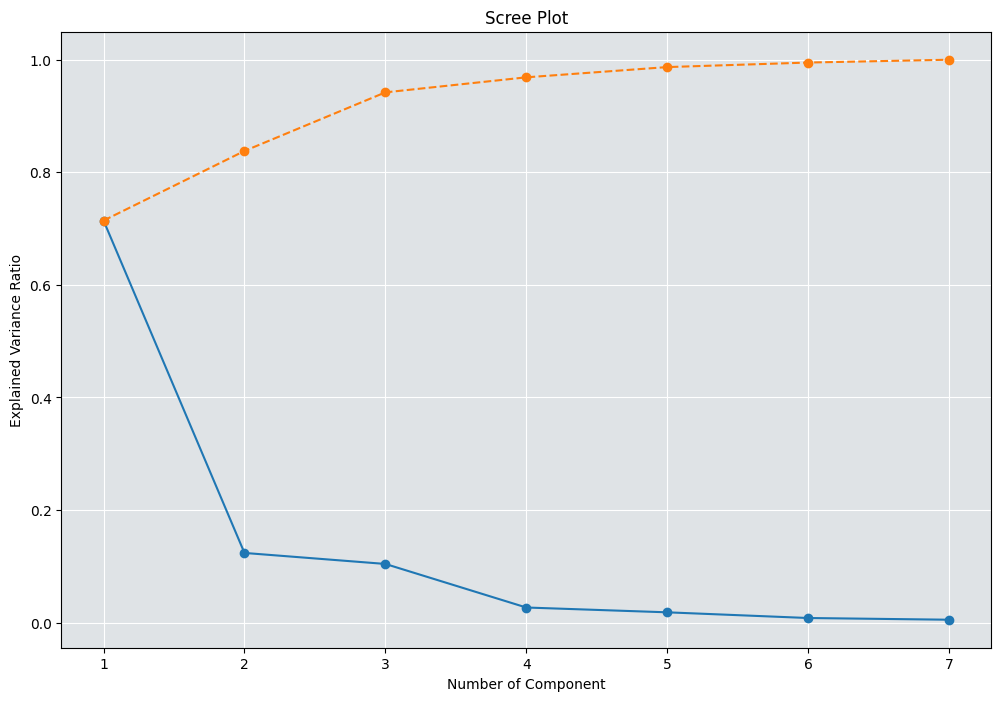

In [24]:
# Scree plot
explain_ratio = pca.explained_variance_ratio_
explain_ratio_cumsum = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(12, 8))
ax = plt.axes()
ax.set_facecolor("#dfe3e6")
plt.grid(color='w', linestyle='solid')
plt.xlabel('Number of Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')

# plotting
plt.plot(range(1, len(explain_ratio) + 1), explain_ratio, marker='o', label='Individual')

# plotting cumulative explained variance ratio
plt.plot(range(1, len(explain_ratio) + 1), explain_ratio_cumsum, marker='o', label='Cumulative', linestyle='--')

#Adding values to plot
for x, ex_ratio, ex_ratio_cum in zip(range(1, explain_ratio.shape[0] + 1),
                                     explain_ratio,
                                     explain_ratio_cum):
  ex_ratio_label = f'{ex_ratio * 100:.2f}%'
  plt.annotate(ex_ratio_label, (x, ex_ratio), textcoords = 'offset points',
               xytext = (5, 5), ha = 'center')
  ex_ratio_cum_label = f'{ex_ratio_cum * 100:.2f}%'
  plt.annotate(ex_ratio_cum_label, (x, ex_ratio_cum), textcoords = 'offset points',
               xytext = (5, 5), ha = 'center')

plt.show()